[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/datalatte-ai/NetflixLATTE/blob/main/NetflixLATTE_sample_code.ipynb)

# Importing a couple of libraries

In [1]:
!pip install tmdbsimple -q
import tmdbsimple as tmdb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import json
from tqdm.auto import tqdm
tqdm.pandas()
plt.style.use('ggplot')

# Add the TMDb API if you need to get more information that way.
tmdb.API_KEY = 'API-KEY-HERE'

# Loading the NetflixLATTE data

Remember to change the path of the NetflixLATTE!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/NetflixLATTE_v1.3.csv", index_col=0)
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Unnamed: 0.1,Title,Date,User id,Original Title,Type,tMDB id,Credits,Info
1131,1131,New Gods: Nezha Reborn,2022-04-28,1621,新神榜：哪吒重生,Movie,663558.0,"{""id"": 663558, ""cast"": [{""adult"": false, ""gend...","{""adult"":false,""backdrop_path"":""/4PKfa0zltSrp1..."
1132,1132,The In Between,2022-04-28,1621,The In Between,Movie,818750.0,"{""id"": 818750, ""cast"": [{""adult"": false, ""gend...","{""adult"":false,""backdrop_path"":""/i9rEpTqC6aIQO..."
1133,1133,Wu Assassins: Season 1: Drunken Watermelon,2022-04-28,1621,Wu Assassins,Serie,86752.0,"{""cast"": [{""adult"": false, ""gender"": 2, ""id"": ...","{""adult"":false,""backdrop_path"":""/tNNBi0zM8zWJI..."
1134,1134,Inventing Anna: Limited Series: The Devil Wore...,2022-04-28,1621,Inventing Anna,Serie,95665.0,"{""cast"": [{""adult"": false, ""gender"": 1, ""id"": ...","{""adult"":false,""backdrop_path"":""/fiKQKFsjahOr8..."
1135,1135,Men in Black: International,2022-04-28,1621,Men in Black: International,Movie,479455.0,"{""id"": 479455, ""cast"": [{""adult"": false, ""gend...","{""adult"":false,""backdrop_path"":""/2FYzxgLNuNVwn..."


# stock market correlation

In [5]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr


# Load NFLX price data here
# We can not share this data due to licencing
corr_df = pd.read_csv("/content/NFLX.csv", index_col=0)
corr_df['Date'] = pd.to_datetime(corr_df['Date'])
corr_df.sort_values(by=['Date'], inplace=True, ascending=True)
corr_df = corr_df.reset_index(drop=True)
corr_df.drop_duplicates(inplace=True)

pbe = df['Date'].value_counts()
pbe = pd.DataFrame({'Date':pbe.index, 'Count':pbe.values})
pbe['Date'] = pd.to_datetime(pbe['Date'])
pbe.sort_values(by=['Date'], inplace=True, ascending=True)
pbe = pbe.reset_index(drop=True)

corr_df = pd.merge(pbe, corr_df, on=['Date'])

corr, _ = pearsonr(corr_df['Close'], corr_df['Count'])
print('pearsonr', corr)

corr, _ = spearmanr(corr_df['Close'], corr_df['Count'])
print('spearmanr', corr)

pearsonr 0.8386453273659006
spearmanr 0.9060784253716075


In [6]:
NFLX = pd.read_csv("NFLX.csv", index_col=0)

# Drop useless information from your data
#NFLX.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

# Dividing the data by 4 to make it easier to compare
NFLX['Close'] = NFLX['Close']/ 4
NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX.sort_values(by=['Date'], inplace=True, ascending=True)

NFLX = NFLX.reset_index(drop=True)
NFLX_mva = NFLX.rolling(20).mean()

In [7]:
import matplotlib.font_manager as fm

# Set your own font
#font_path = 'Roboto-Black.ttf'
#plt.rc('font', family='Roboto Black')


plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

In [8]:
pbe = df['Date'].value_counts()
pbe = pd.DataFrame({'Date':pbe.index, 'Count':pbe.values})
pbe['Date'] = pd.to_datetime(pbe['Date'])
pbe.sort_values(by=['Date'], inplace=True, ascending=True)
pbe = pbe.reset_index(drop=True)
pbe_mva = pbe.rolling(20).mean()

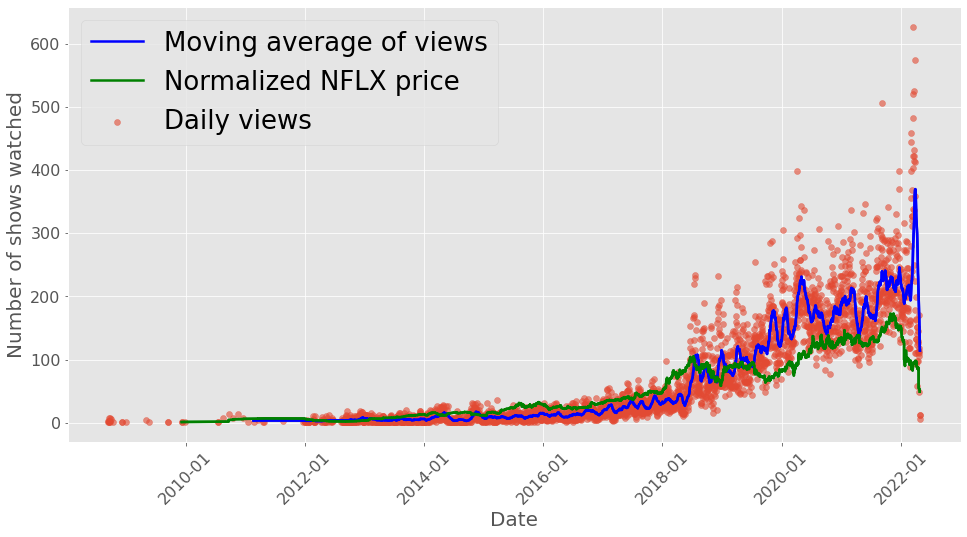

In [20]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(pbe['Date'], pbe['Count'], alpha=0.6, label='Daily views')
plt.plot(pbe['Date'], pbe_mva, color='blue', label='Moving average of views', linewidth=2.5)
plt.plot(pbe['Date'], pbe_mva, color='blue', linewidth=2.5)
plt.plot(NFLX['Date'], NFLX_mva, color='green', label='Normalized NFLX price', linewidth=2.5)
plt.plot(NFLX['Date'], NFLX_mva, color='green', linewidth=2.5)
leg = plt.legend(prop={'size': 26}, loc = "upper left")
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of shows watched', fontsize=20)
plt.xticks(rotation='45')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.savefig("Netflix stock market price vs veiws.svg", format="svg", bbox_inches = 'tight', pad_inches = .2)
plt.savefig("Netflix stock market price vs veiws.png", format="png", bbox_inches = 'tight', pad_inches = .2, transparent=True)
plt.show()

# Netflix and COVID

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
pbe = df['Date'].value_counts()
pbe = pd.DataFrame({'Date':pbe.index, 'Count':pbe.values})

In [12]:
pbe['Date'] = pd.to_datetime(pbe['Date'])
pbe.sort_values(by=['Date'], inplace=True, ascending=True)
pbe = pbe.reset_index(drop=True)

In [13]:
from scipy.signal import savgol_filter
plt.style.use('ggplot')

pbe_mva = pbe.rolling(30).mean()

pbe_savgol = savgol_filter(pbe['Count'], 31, 2)

In [14]:
# Load COVID data here
# We can not share this data due to licencing
covid = pd.read_csv("covid.csv", index_col=0)
covid['Date'] = pd.to_datetime(covid['Date'])
covid.sort_values(by=['Date'], inplace=True, ascending=True)
covid['total_cases'] = covid['total_cases']/1200000
covid_mva = covid.rolling(1).mean()
covid.head()

,Date,total_cases
0,2020-01-22,0.000464
1,2020-01-23,0.000548
2,2020-01-24,0.000787
3,2020-01-25,0.001197
4,2020-01-26,0.001767


In [15]:
import matplotlib.font_manager as fm

# Set your own font
#font_path = 'Roboto-Black.ttf'
#plt.rc('font', family='Roboto Black')

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

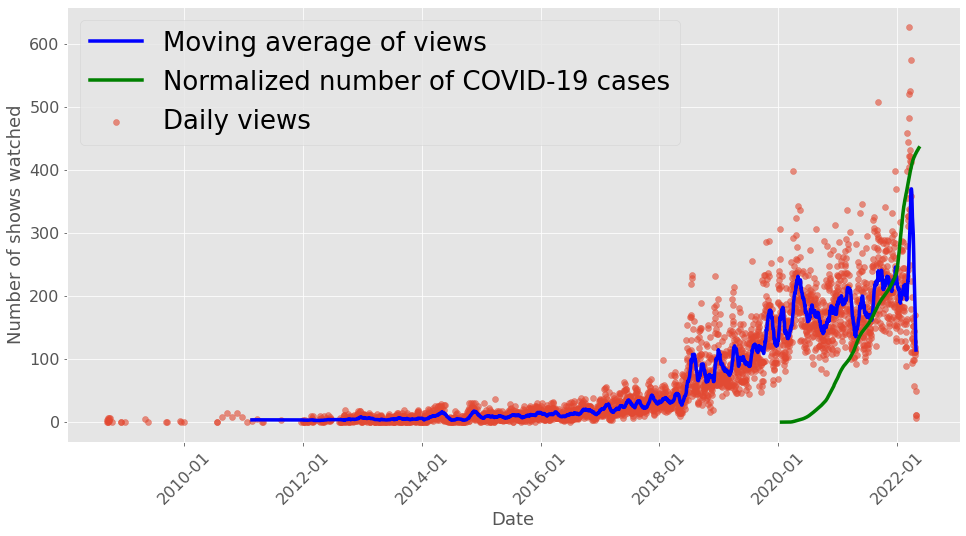

In [16]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(pbe['Date'], pbe['Count'], alpha=0.6, label='Daily views')
plt.plot(pbe['Date'], pbe_mva, color='blue', label='Moving average of views', linewidth=3.5)
plt.plot(covid['Date'], covid_mva, color='green', label='Normalized number of COVID-19 cases', linewidth=3.5)
leg = plt.legend(prop={'size': 26})
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of shows watched', fontsize=18)
plt.xticks(rotation='45')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.savefig("COVID Netflix data total.svg", format="svg", bbox_inches = 'tight', pad_inches = .2)
plt.savefig("COVID Netflix data total.png", format="png", bbox_inches = 'tight', pad_inches = .2)
plt.show()

#More code coming soon!

Please feel free to suggest your codes on our [github](https://github.com/datalatte-ai/NetflixLATTE)!
